# DỰ ĐOÁN GIÁ XE

Đỗ Nguyên Ánh	
- Thu thập dữ liệu ( crawl) 
- Thống kê tổng quan về tập dữ liệu và xuất ra các thống kê mô tả trực quan về các đặc trưng

Nguyễn Trung Hiếu	
- Lựa chọn đặc trưng, làm sạch và chuẩn hóa dữ liệu, giảm chiều dữ liệu, … 
- Trực quan hoá

Trương Công Thái	
- Mô hình hóa dữ liệu
- Đánh giá và kết luận mô hình


# Import library

link website: https://bonbanh.com/

In [350]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Crawling data from website 

In [351]:

link_base = "https://bonbanh.com/oto/page,"
list_link = []

with open("craw_data.csv", "w", encoding='utf_8') as file:
    # Ghi tiêu đề cho file csv
    file.write("Id,Year,New Or Old,Name,Address,Production Origin,Color,Fuel,Car Gearbox,Used (kilomet),Price\n")
    # Tạo link truy cập
    for index in range(1,500):
        item = link_base + str(index)
        list_link.append(item)

    # Kiểm tra xem bạn có phải là robot không
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    data = []
    for i in range(len(list_link)):

        link = list_link[i]
        # Sau khi đã có link thì mình sẽ requests về cái trang web đó   
        response = requests.get(link, headers=headers) 
        # Xử lý file html khi đã lấy từ website về
        soup = BeautifulSoup(response.text, 'html.parser')       
        data = soup.find('div', attrs={'class':'g-box-content'}).find_all('a', attrs={'itemprop':'url'})
        #lấy thông tin 
        for j in range(1,20):
            try:
                # Lấy dữ liệu từ các thẻ div chứa dữ liệu cần lấy bằng cách cắt chuỗi từ các thuộc tính text trong thẻ
                new_or_old = data[j].find_all('div')[0].text[:-5]

                year = data[j].find_all('div')[0].text[-5:] 
            
                name = data[j].find_all('div')[1].text[:-6]

                price = data[j].find_all('div')[2].text

                address = data[j].find_all('div')[3].text

                id = data[j].find_all('div')[4].text[6:]

                production_origin = data[j].find_all('div')[5].text.split('...')[0][2:].split(', ')[0]

                color = data[j].find_all('div')[5].text.split('...')[0][2:].split(', ')[1]

                fuel = data[j].find_all('div')[5].text.split('...')[0][2:].split(', ')[2]

                car_gearbox = data[j].find_all('div')[5].text.split('...')[0][2:].split(', ')[3]

                if(data[j].find_all('div')[0].text[:-5].strip() == 'Xe cũ'):

                    used = data[j].find_all('div')[5].text.split('...')[0][2:].split(', ')[4].replace(',','').split(' ')[2]
                else:
                    used = "0"
            except:
                break
            # Mỗi lần lấy được dữ liệu sẽ được lưu vào biến srt1
            srt1 = f"{str(id.strip())},{str(year.strip())},{str(new_or_old.strip())},\"{str(name.strip())}\",{str(address.strip())},{str(production_origin.strip())},{str(color.strip())},\"{str(fuel.strip())}\",{str(car_gearbox.strip())},{str(used.strip())},{str(price.strip())}\n"
            # Ghi str1 vào file craw_data.csv
            file.write(srt1)
file.close()



# Read file

In [352]:


df = pd.read_csv('craw_data.csv',sep=',', engine='python',encoding='utf_8')
df.head()


,Id,Year,New Or Old,Name,Address,Production Origin,Color,Fuel,Car Gearbox,Used (kilomet),Price
0,4132061,2022,Xe mới,Mercedes Benz GLE Class GLE 450 4Matic,Hà Nội,Xe nhập khẩu,màu đỏ,máy xăng 3.0 L,số tự động,0,4 Tỷ 359 Triệu
1,3864921,2022,Xe mới,Mercedes Benz GLC 300 4Matic,Hà Nội,Xe lắp ráp trong nước,màu đỏ,máy xăng 2.0 L,số tự động,0,2 Tỷ 398 Triệu
2,4147049,2022,Xe mới,Mercedes Benz GLC 300 4Matic,Hà Nội,Xe lắp ráp trong nước,màu đen,máy xăng 2.0 L,số tự động,0,2 Tỷ 398 Triệu
3,4248075,2019,Xe cũ,Lexus RX 300,Hà Nội,Xe nhập khẩu,màu đen,máy xăng 2.0 L,số tự động,10000,3 Tỷ 80 Triệu
4,4294679,2022,Xe mới,Toyota Veloz Cross Top 1.5 CVT,Hà Nội,Xe nhập khẩu,màu trắng,máy xăng 1.5 L,số tự động,0,688 Triệu


In [353]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3640 entries, 0 to 3639
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 3640 non-null   int64 
 1   Year               3640 non-null   int64 
 2   New Or Old         3640 non-null   object
 3   Name               3640 non-null   object
 4   Address            3640 non-null   object
 5   Production Origin  3640 non-null   object
 6   Color              3640 non-null   object
 7   Fuel               3640 non-null   object
 8   Car Gearbox        3640 non-null   object
 9   Used (kilomet)     3640 non-null   int64 
 10  Price              3640 non-null   object
dtypes: int64(3), object(8)
memory usage: 312.9+ KB


In [354]:
df.describe()

,Id,Year,Used (kilomet)
count,3.640000e+03,3640.000000,3.640000e+03
mean,4.153745e+06,2018.516209,3.074837e+04
std,4.565672e+05,4.462141,5.824055e+04
min,5.598400e+04,1990.000000,0.000000e+00
25%,4.151636e+06,2016.000000,0.000000e+00
50%,4.311742e+06,2020.000000,1.000000e+04
75%,4.378078e+06,2022.000000,5.000000e+04
max,4.411163e+06,2022.000000,1.502479e+06


# DATA PROCESSING

# Data cleaning

In [355]:
print(set(df['Fuel']))

{'máy xăng 4.6 L', 'xe hybrid 2.0 L', 'xe hybrid', 'máy xăng 4.5 L', 'máy xăng 6.8 L', 'xe điện 0.1 L', 'máy xăng 6.0 L', 'máy xăng 3.2 L', 'máy xăng 6.7 L', 'máy xăng 1.2 L', 'máy xăng 1.4 L', 'máy xăng 3.8 L', 'xe hybrid 1.8 L', 'máy xăng 4.7 L', 'máy xăng 6.6 L', 'xe hybrid 3.5 L', 'máy xăng 5.6 L', 'máy dầu 2.1 L', 'máy xăng 1.3 L', 'máy xăng 6.2 L', 'máy xăng 0.8 L', 'máy xăng 4.2 L', 'máy dầu 3.2 L', 'xe điện 0.2 L', 'máy xăng 2.4 L', 'máy xăng 4.0 L', 'máy xăng 4.8 L', 'máy xăng 3.4 L', 'máy dầu 3.0 L', 'máy xăng 1.1 L', 'máy xăng 0.9 L', 'máy xăng 3.3 L', 'máy xăng 2.3 L', 'máy xăng 5.4 L', 'máy xăng 3.0 L', 'máy dầu 2.5 L', 'máy xăng 2.6 L', 'máy xăng 2.7 L', 'máy dầu 2.0 L', 'máy xăng 2.9 L', 'máy xăng 2.2 L', 'xe hybrid 3.0 L', 'máy dầu 2.4 L', 'máy xăng 3.6 L', 'máy xăng 5.5 L', 'xe hybrid 2.5 L', 'máy xăng 5.7 L', 'máy dầu 2.8 L', 'máy dầu 2.2 L', 'máy dầu 7.8 L', 'máy xăng 1.6 L', 'máy xăng 5.0 L', 'máy xăng', 'máy dầu 1.7 L', 'máy dầu 11.1 L', 'máy xăng 2.5 L', 'máy dầu 

Kiểm tra len(df['Fuel'][i].split(' ')[:])

In [356]:
list_check = []
for i in range (df.shape[0]):
    list_check.append((len(df['Fuel'][i].split(' ')[:])))

print(set(list_check))

{2, 4}


Có nhiều dữ liệu khác nhau có thể được mở rộng từ các cột hiện tại, nên ta sẽ mở rộng chúng

In [357]:
for i in range(df.shape[0]):
    #tách company từ cột Name
    df.at[i, 'Company'] = df['Name'][i].split(' ')[0]

    #tách Fuel Type và Machine Capacity (L)
    df.at[i, 'Fuel Type'] = df['Fuel'][i].split(' ')[0] + ' ' + df['Fuel'][i].split(' ')[1]
    if(len(df['Fuel'][i].split(' ')[:]) == 4):
        df.at[i, 'Machine Capacity (L)'] = df['Fuel'][i].split(' ')[2]
    elif(len(df['Fuel'][i].split(' ')[:]) == 2):
        df.at[i, 'Machine Capacity (L)'] = None
    


In [358]:
# convert
df['Machine Capacity (L)'] = df['Machine Capacity (L)'].astype(float)

In [359]:
print(set(df['Machine Capacity (L)']))

{0.8, 1.5, 2.0, 3.0, 1.25, 2.4, 1.2, 1.6, 1.8, 1.3, 1.4, 2.9, 3.5, 5.7, 2.5, 1.0, nan, nan, nan, 11.1, nan, nan, 4.0, 4.5, nan, 5.0, 5.5, nan, 6.0, nan, nan, nan, nan, nan, 1.9, nan, 3.4, nan, nan, nan, nan, nan, nan, 0.2, nan, nan, nan, nan, nan, nan, 5.4, nan, nan, nan, nan, nan, nan, 2.3, 2.8, 3.8, 3.3, 4.8, 6.8, 7.8, nan, nan, nan, nan, 0.9, nan, nan, nan, nan, nan, nan, 1.7, nan, 0.1, nan, 2.2, 2.7, 3.2, 3.7, 4.7, 4.2, nan, 6.7, 6.2, nan, nan, nan, nan, 4.6, 5.6, 6.6, nan, nan, 1.1, nan, nan, nan, 2.1, 2.6, nan, nan, nan, 3.6, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}


# Missing data

In [360]:
df.isnull().sum()

Id                       0
Year                     0
New Or Old               0
Name                     0
Address                  0
Production Origin        0
Color                    0
Fuel                     0
Car Gearbox              0
Used (kilomet)           0
Price                    0
Company                  0
Fuel Type                0
Machine Capacity (L)    81
dtype: int64

Xử lý dữ liệu trống bằng phương pháp thay thế bằng giá trị ngẫu nhiên
- Kỹ thuật này cũng giả định rằng dữ liệu trống hoàn toàn ngẫu nhiên
- Thay thế dữ liệu trống bằng các giá trị ngẫu nhiên của cột tương ứng
- Dùng hàm dropna() của đối tượng DataFrame để bỏ qua các NaN values

In [361]:
# xử lý các NaN trong cột Machine Capacity (L)
df['Machine Capacity (L)'].isnull().sum()
# lấy ngẫu nhiên từ cột Machine Capacity (L) một giá trị khác NaN,
# kết quả sẽ ko lặp lại sau mỗi lần thực hiện lệnh
df['Machine Capacity (L)'].dropna().sample()

1811    2.0
Name: Machine Capacity (L), dtype: float64

In [362]:
random_samples = df['Machine Capacity (L)'].dropna().sample(n=df['Machine Capacity (L)'].isnull()
.sum(),random_state=0)
random_samples

2643    1.6
1490    2.0
583     2.0
117     2.2
2222    2.0
       ... 
1031    2.0
832     2.2
409     2.3
3495    1.5
1019    2.0
Name: Machine Capacity (L), Length: 81, dtype: float64

Chỉ số của các hàng bị trống dữ liệu 

In [363]:

df[df['Machine Capacity (L)'].isnull()].index

Int64Index([ 220,  221,  244,  262,  281,  313,  339,  346,  368,  373,  375,
             647,  701,  745,  767,  891,  944, 1083, 1129, 1160, 1231, 1283,
            1340, 1414, 1417, 1443, 1520, 1599, 1601, 1609, 1617, 1790, 1822,
            1846, 1860, 1981, 1987, 2034, 2128, 2130, 2214, 2251, 2252, 2305,
            2331, 2333, 2360, 2383, 2400, 2444, 2492, 2502, 2524, 2547, 2589,
            2685, 2767, 2771, 2834, 2850, 2910, 2973, 2977, 3023, 3066, 3147,
            3168, 3170, 3256, 3258, 3260, 3284, 3291, 3292, 3295, 3303, 3442,
            3502, 3560, 3597, 3604],
           dtype='int64')

Gán lại index cho series ngẫu nhiên vừa tạo

In [364]:

random_samples.index = df[df['Machine Capacity (L)'].isnull()].index

Thay thế dữ liệu trống bằng các giá trị ngẫu nhiên của cột

In [365]:

df['Machine Capacity (L) Random']=df['Machine Capacity (L)']
df.loc[df['Machine Capacity (L)'].isnull(), 'Machine Capacity (L) Random']=random_samples
df.tail()

,Id,Year,New Or Old,Name,Address,Production Origin,Color,Fuel,Car Gearbox,Used (kilomet),Price,Company,Fuel Type,Machine Capacity (L),Machine Capacity (L) Random
3635,3298640,2022,Xe mới,Suzuki Super Carry Truck 1.0 MT,Hà Nội,Xe lắp ráp trong nước,màu xanh,máy xăng 1.0 L,số tay,0,238 Triệu,Suzuki,máy xăng,1.0,1.0
3636,4184814,2016,Xe cũ,Porsche Cayenne S,Hà Nội,Xe nhập khẩu,màu nâu,máy xăng 3.6 L,số tự động,52000,4 Tỷ 150 Triệu,Porsche,máy xăng,3.6,3.6
3637,3394496,2022,Xe mới,Suzuki Ertiga Sport 1.5 AT,Hưng Yên,Xe nhập khẩu,màu trắng,máy xăng 1.5 L,số tự động,0,558 Triệu,Suzuki,máy xăng,1.5,1.5
3638,4376164,2019,Xe cũ,Toyota Yaris 1.5G,Hà Nội,Xe nhập khẩu,màu đỏ,máy xăng 1.5 L,số tự động,46000,610 Triệu,Toyota,máy xăng,1.5,1.5
3639,3281968,2022,Xe mới,VinFast Lux A 2.0 Cao cấp,Hà Nội,Xe lắp ráp trong nước,màu nâu,máy xăng 2.0 L,số tự động,0,944 Triệu,VinFast,máy xăng,2.0,2.0


Vẽ hàm mật độ xác suất của cột Machine Capacity (L) trước và sau khi điền

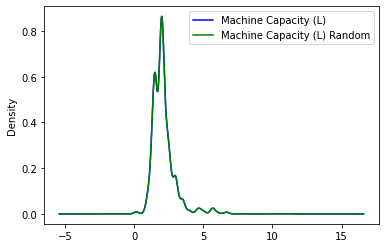

In [366]:


fig = plt.figure()
ax = fig.add_subplot(111)
df['Machine Capacity (L)'].plot(kind='kde', ax=ax, color='blue')
df['Machine Capacity (L) Random'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Xóa các cột ban đầu mà không ảnh hưởng

In [367]:
df.drop(["Name"],axis=1,inplace=True)
df.drop(["Id"],axis=1,inplace=True)
df.drop(["Fuel"],axis=1,inplace=True)
df.drop(["Machine Capacity (L)"],axis=1,inplace=True)

Chuyển cột 'Price' về cuối df

In [368]:
moving_column = df.pop('Price')
df.insert(10,'Price',moving_column)

In [369]:
df.head()

,Year,New Or Old,Address,Production Origin,Color,Car Gearbox,Used (kilomet),Company,Fuel Type,Machine Capacity (L) Random,Price
0,2022,Xe mới,Hà Nội,Xe nhập khẩu,màu đỏ,số tự động,0,Mercedes,máy xăng,3.0,4 Tỷ 359 Triệu
1,2022,Xe mới,Hà Nội,Xe lắp ráp trong nước,màu đỏ,số tự động,0,Mercedes,máy xăng,2.0,2 Tỷ 398 Triệu
2,2022,Xe mới,Hà Nội,Xe lắp ráp trong nước,màu đen,số tự động,0,Mercedes,máy xăng,2.0,2 Tỷ 398 Triệu
3,2019,Xe cũ,Hà Nội,Xe nhập khẩu,màu đen,số tự động,10000,Lexus,máy xăng,2.0,3 Tỷ 80 Triệu
4,2022,Xe mới,Hà Nội,Xe nhập khẩu,màu trắng,số tự động,0,Toyota,máy xăng,1.5,688 Triệu


Ghi lại file clean data

In [370]:
with open("clean_data.csv", "w", encoding='utf_8') as file:
    file.write("Year,New Or Old,Address,Production Origin,Color,Car Gearbox,Used (kilomet),Company,Fuel Type,Machine Capacity (L) Random,Price\n")
    for i in range(df.shape[0]):
        srt2 = f"{str(df['Year'][i])}, {str(df['New Or Old'][i])}, {str(df['Address'][i])}, {str(df['Production Origin'][i])}, {str(df['Color'][i])}, {str(df['Car Gearbox'][i])}, {str(df['Used (kilomet)'][i])}, {str(df['Company'][i])}, {str(df['Fuel Type'][i])}, {str(df['Machine Capacity (L) Random'][i])}, {str(df['Price'][i])}\n"
        file.write(srt2)
file.close()

Encoding for 'Price' column

In [371]:
for i in range (df.shape[0]):
    result = 0.0
    list_temp = df['Price'][i].split(' ')[:]

    for j in range(len(list_temp)):
        
        if(list_temp[j] == 'Tỷ'): # 4 Tỷ 359 Triệu , 688 Triệu	
            base1 = 1000000000.0
            temp_result = pd.to_numeric(list_temp[j-1], downcast='integer') * base1
            result = result + temp_result
        if (list_temp[j] == 'Triệu'):
            base2 = 1000000.0
            temp_result = pd.to_numeric(list_temp[j-1], downcast='integer') * base2
            result = result + temp_result
    
    df.at[i, 'Price'] = result


df['Price'] = pd.to_numeric(df['Price'], downcast='float')



In [372]:
df.head()

,Year,New Or Old,Address,Production Origin,Color,Car Gearbox,Used (kilomet),Company,Fuel Type,Machine Capacity (L) Random,Price
0,2022,Xe mới,Hà Nội,Xe nhập khẩu,màu đỏ,số tự động,0,Mercedes,máy xăng,3.0,4.359000e+09
1,2022,Xe mới,Hà Nội,Xe lắp ráp trong nước,màu đỏ,số tự động,0,Mercedes,máy xăng,2.0,2.398000e+09
2,2022,Xe mới,Hà Nội,Xe lắp ráp trong nước,màu đen,số tự động,0,Mercedes,máy xăng,2.0,2.398000e+09
3,2019,Xe cũ,Hà Nội,Xe nhập khẩu,màu đen,số tự động,10000,Lexus,máy xăng,2.0,3.080000e+09
4,2022,Xe mới,Hà Nội,Xe nhập khẩu,màu trắng,số tự động,0,Toyota,máy xăng,1.5,6.880000e+08


Data Visualization

Trực quan sự phân bố giá trị của cột 'Price'

C:\Users\dongu\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(63000000.0, 41990000000.0)

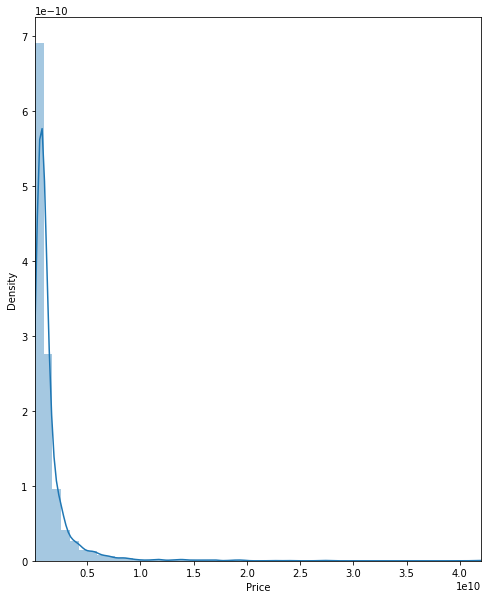

In [373]:
f, ax = plt.subplots(figsize=(8,10))
sns.distplot(df['Price'])
plt.xlim([6.300000e+07,4.199000e+10])

New Or Old

In [374]:
print(set(df['New Or Old']))

{'Xe cũ <', 'Xe mới', 'Xe cũ'}


In [375]:
for i in range(df.shape[0]):
    if(df['New Or Old'][i] == 'Xe cũ <'):
        df['New Or Old'][i] = df['New Or Old'][i].replace('Xe cũ <', 'Xe cũ')

C:\Users\dongu\AppData\Local\Temp\ipykernel_364\3490621823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Or Old'][i] = df['New Or Old'][i].replace('Xe cũ <', 'Xe cũ')


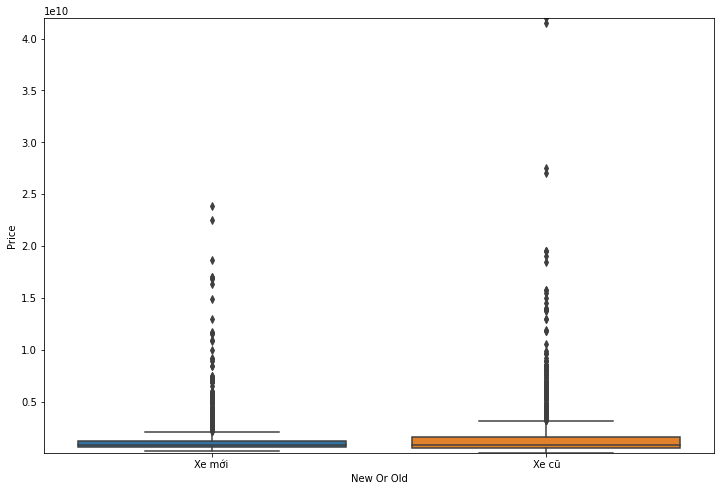

In [376]:
var = 'New Or Old'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=6.300000e+07, ymax=4.199000e+10);

Production Origin

In [377]:
print(set(df['Production Origin']))

{'Xe lắp ráp trong nước', 'Xe nhập khẩu'}


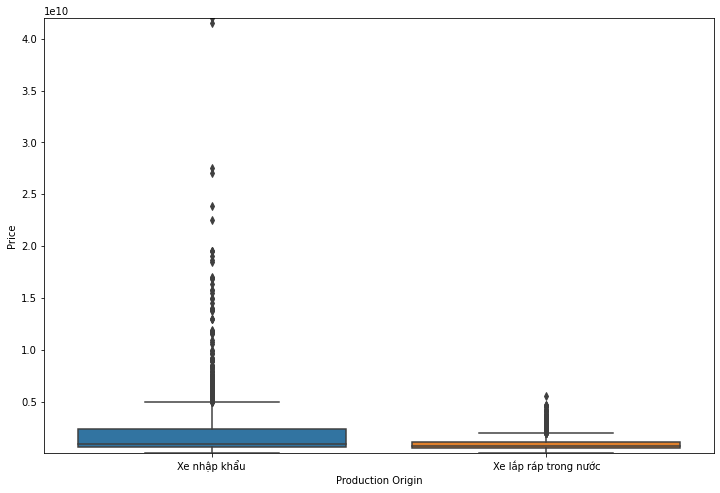

In [378]:
var = 'Production Origin'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=6.300000e+07, ymax=4.199000e+10);

Car Gearbox

In [379]:
print(set(df['Car Gearbox']))

{'số tự động', 'số tay'}


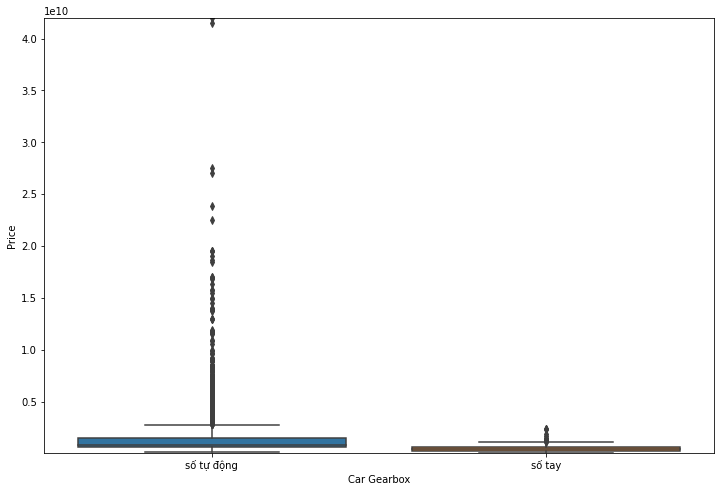

In [380]:
var = 'Car Gearbox'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=6.300000e+07, ymax=4.199000e+10);

Year

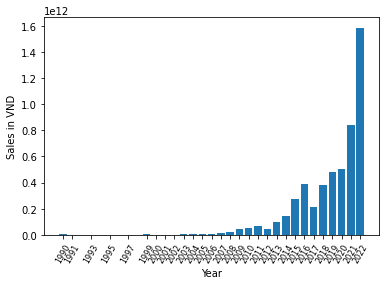

In [381]:
# groupby giá trị của cột 'Price' theo 'Year' 
sales_value = df.groupby('Year').sum()['Price']
years = list(set(df['Year']))
plt.bar(x=years, height=sales_value)
plt.xticks(years, rotation= 60, size=8)
plt.xlabel('Year')
plt.ylabel('Sales in VND')
plt.show()
# Điều ở trên chưa chính xác khi mà có thể có các loại xe có giá trị đắt đỏ. 

Address

<Figure size 1440x720 with 0 Axes>

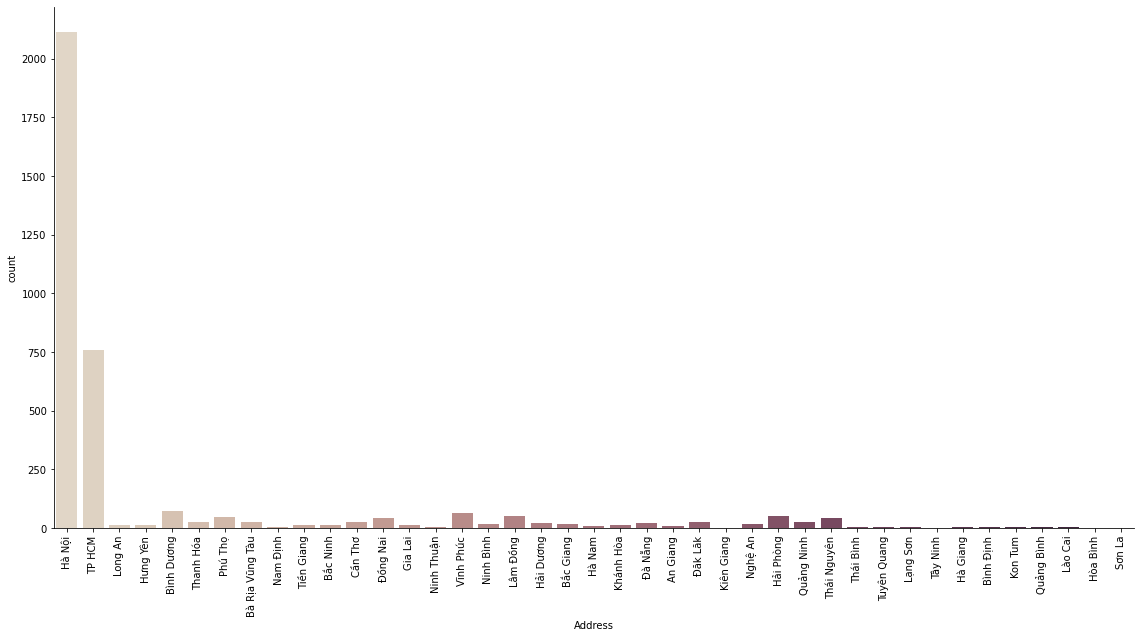

In [382]:
var = "Address"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df)
plt.xticks(rotation=90);

Color

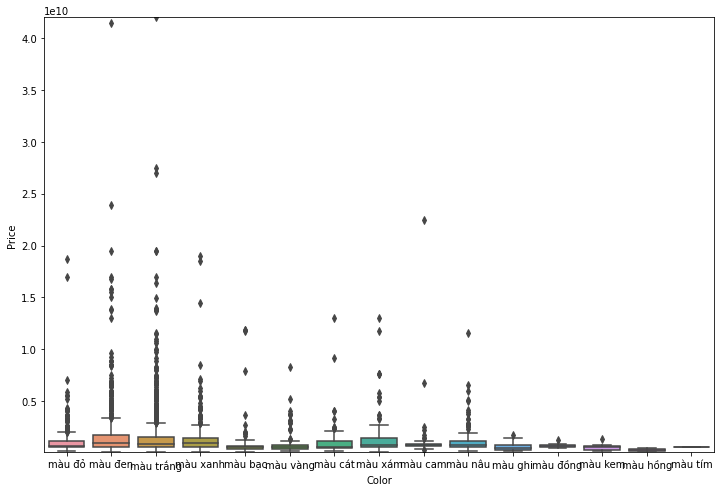

In [383]:
var = 'Color'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=6.300000e+07, ymax=4.199000e+10);

Company

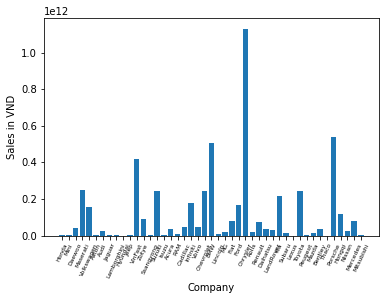

In [384]:
sales_value = df.groupby('Company').sum()['Price']
Company = list(set(df['Company']))
plt.bar(x=Company, height=sales_value)
plt.xticks(Company, rotation= 65, size=6)
plt.xlabel('Company')
plt.ylabel('Sales in VND')
plt.show()

Used (kilomet)

Text(0.5, 1.0, 'Giá bán tương ứng theo số kilomet đã chạy')

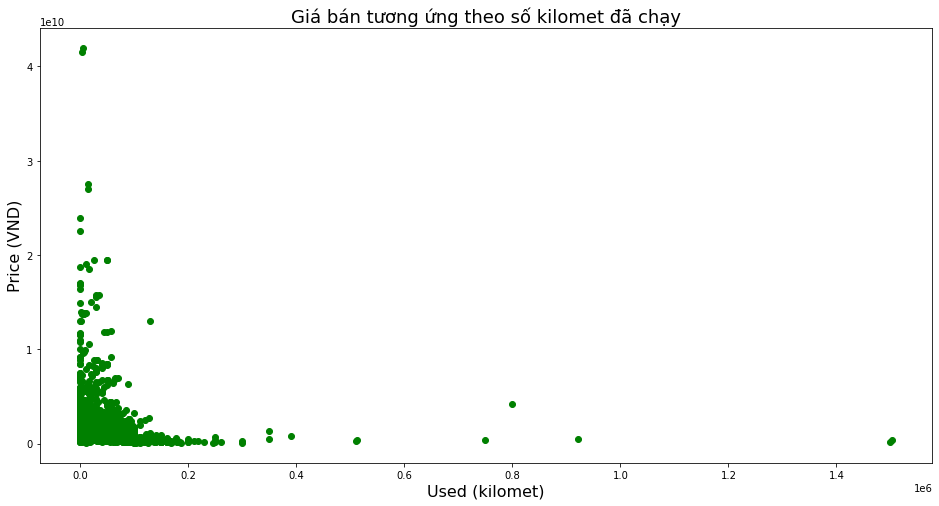

In [385]:

x = df['Used (kilomet)'].values
y = df['Price'].values

plt.figure(figsize=(16, 8))
plt.scatter(x, y, color='green', )
plt.xlabel('Used (kilomet)', fontsize=16)
plt.ylabel('Price (VND)', fontsize=16)
plt.title("Giá bán tương ứng theo số kilomet đã chạy", fontsize=18)

Fuel Type

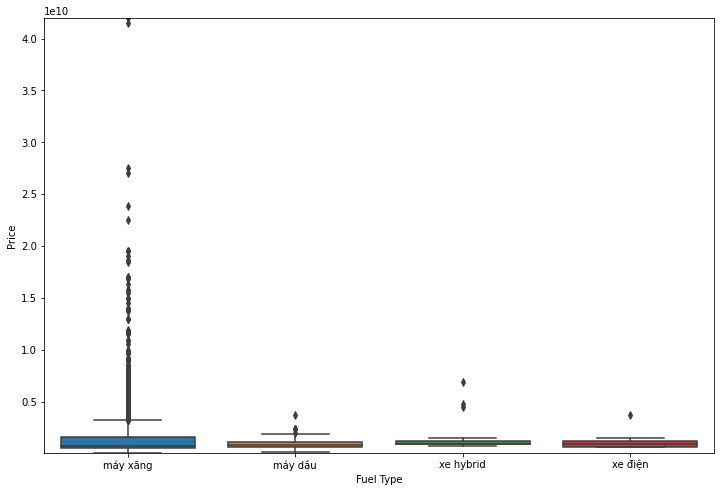

In [386]:
var = 'Fuel Type'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=6.300000e+07, ymax=4.199000e+10);

Machine Capacity (L)

Text(0.5, 1.0, 'Giá bán tương ứng theo số dung tích xe')

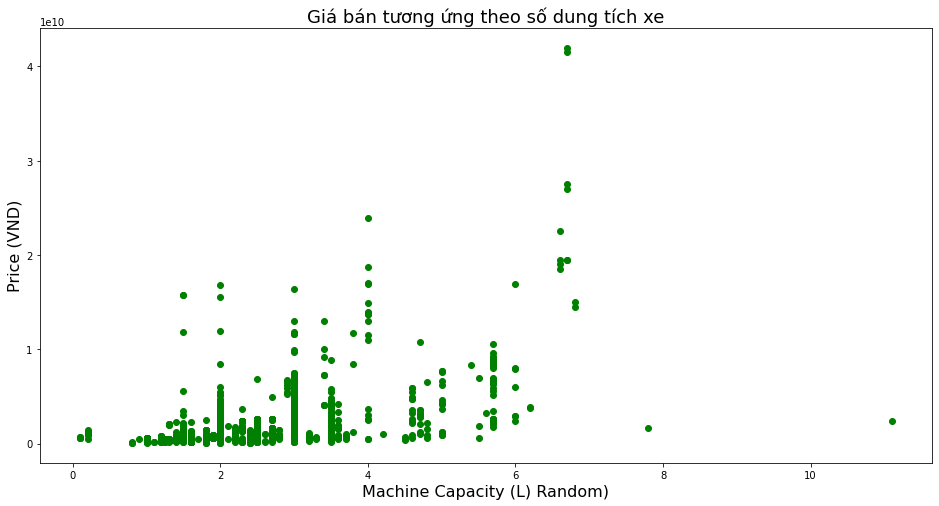

In [387]:
x = df['Machine Capacity (L) Random'].values
y = df['Price'].values

plt.figure(figsize=(16, 8))
plt.scatter(x, y, color='green', )
plt.xlabel('Machine Capacity (L) Random)', fontsize=16)
plt.ylabel('Price (VND)', fontsize=16)
plt.title("Giá bán tương ứng theo số dung tích xe", fontsize=18)

Do không tìm ra được quy luật tiềm ẩn trong cột Machine Capacity(L) và cột Address nên em drop các cột này đi

In [388]:
df.drop(["Machine Capacity (L) Random"],axis=1,inplace=True)
df.drop(["Address"],axis=1,inplace=True)
df.head()

,Year,New Or Old,Production Origin,Color,Car Gearbox,Used (kilomet),Company,Fuel Type,Price
0,2022,Xe mới,Xe nhập khẩu,màu đỏ,số tự động,0,Mercedes,máy xăng,4.359000e+09
1,2022,Xe mới,Xe lắp ráp trong nước,màu đỏ,số tự động,0,Mercedes,máy xăng,2.398000e+09
2,2022,Xe mới,Xe lắp ráp trong nước,màu đen,số tự động,0,Mercedes,máy xăng,2.398000e+09
3,2019,Xe cũ,Xe nhập khẩu,màu đen,số tự động,10000,Lexus,máy xăng,3.080000e+09
4,2022,Xe mới,Xe nhập khẩu,màu trắng,số tự động,0,Toyota,máy xăng,6.880000e+08


# Feature Engineering

# Encoding

Encoding for 'New or Old' column

In [416]:

for i in range(df.shape[0]):
    if(df['New Or Old'][i] == 'Xe cũ <'):
        df['New Or Old'][i] = df['New Or Old'][i].replace('Xe cũ <', '0')
    elif (df['New Or Old'][i] == 'Xe cũ'):
        df['New Or Old'][i] = df['New Or Old'][i].replace('Xe cũ', '0')
    elif (df['New Or Old'][i] == 'Xe mới'):
        df['New Or Old'][i] = df['New Or Old'][i].replace('Xe mới', '1')

df['New Or Old'] = pd.to_numeric(df['New Or Old'], downcast='integer')

print(set(df['New Or Old']));



{0, 1}


Encoding for Production Origin column

In [390]:
print(set(df['Production Origin']))

{'Xe lắp ráp trong nước', 'Xe nhập khẩu'}


In [414]:
for i in range(df.shape[0]):
    if(df['Production Origin'][i] == 'Xe nhập khẩu'):
        df['Production Origin'][i] = df['Production Origin'][i].replace('Xe nhập khẩu', '0')
    elif (df['Production Origin'][i] == 'Xe lắp ráp trong nước'):
        df['Production Origin'][i] = df['Production Origin'][i].replace('Xe lắp ráp trong nước', '1')

df['Production Origin'] = pd.to_numeric(df['Production Origin'], downcast='integer')

print(set(df['Production Origin']));

{0, 1}


In [417]:
df.head()

,Year,New Or Old,Production Origin,Color,Car Gearbox,Used (kilomet),Company,Fuel Type,Price
0,2022,1,0,màu đỏ,1,0,Mercedes,máy xăng,4.359000e+09
1,2022,1,1,màu đỏ,1,0,Mercedes,máy xăng,2.398000e+09
2,2022,1,1,màu đen,1,0,Mercedes,máy xăng,2.398000e+09
3,2019,0,0,màu đen,1,10000,Lexus,máy xăng,3.080000e+09
4,2022,1,0,màu trắng,1,0,Toyota,máy xăng,6.880000e+08


Encoding for Car Gearbox column

In [392]:
print(set(df['Car Gearbox']))

{'số tự động', 'số tay'}


In [415]:
for i in range(df.shape[0]):
    if(df['Car Gearbox'][i] == 'số tự động'):
        df['Car Gearbox'][i] = df['Car Gearbox'][i].replace('số tự động', '1')
    elif (df['Car Gearbox'][i] == 'số tay'):
        df['Car Gearbox'][i] = df['Car Gearbox'][i].replace('số tay', '0')

df['Car Gearbox'] = pd.to_numeric(df['Car Gearbox'], downcast='integer')

print(set(df['Car Gearbox']));

{0, 1}


In [394]:
df.head()

,Year,New Or Old,Production Origin,Color,Car Gearbox,Used (kilomet),Company,Fuel Type,Price
0,2022,1,0,màu đỏ,1,0,Mercedes,máy xăng,4.359000e+09
1,2022,1,1,màu đỏ,1,0,Mercedes,máy xăng,2.398000e+09
2,2022,1,1,màu đen,1,0,Mercedes,máy xăng,2.398000e+09
3,2019,0,0,màu đen,1,10000,Lexus,máy xăng,3.080000e+09
4,2022,1,0,màu trắng,1,0,Toyota,máy xăng,6.880000e+08


One-hot-encoding

In [395]:
var = 'Color'
Color = df[[var]]
Color = pd.get_dummies(Color,drop_first=True)
var = 'Company'
Company = df[[var]]
Company = pd.get_dummies(Company,drop_first=True)
var = 'Fuel Type'
Fuel_t = df[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)


In [396]:
data= pd.concat([df,Color,Company,Fuel_t],axis=1)
data.drop(["Color"],axis=1,inplace=True)
data.drop(["Company"],axis=1,inplace=True)
data.drop(["Fuel Type"],axis=1,inplace=True)
data.head()

,Year,New Or Old,Production Origin,Car Gearbox,Used (kilomet),Price,Color_màu cam,Color_màu cát,Color_màu ghi,Color_màu hồng,...,Company_Suzuki,Company_Thaco,Company_Toyota,Company_VinFast,Company_Volkswagen,Company_Volvo,Company_Zotye,Fuel Type_máy xăng,Fuel Type_xe hybrid,Fuel Type_xe điện
0,2022,1,0,1,0,4.359000e+09,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2022,1,1,1,0,2.398000e+09,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2022,1,1,1,0,2.398000e+09,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2019,0,0,1,10000,3.080000e+09,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2022,1,0,1,0,6.880000e+08,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


# Outliers

Used (kilomet)

Text(0, 0.5, 'No of passenger')

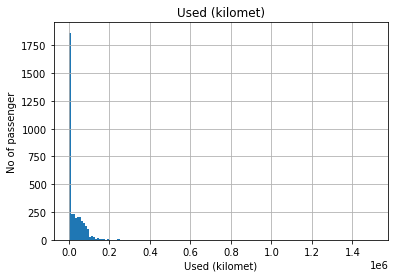

In [397]:
figure=data['Used (kilomet)'].hist(bins=150)
figure.set_title('Used (kilomet)')
figure.set_xlabel('Used (kilomet)')
figure.set_ylabel('No of passenger')

<AxesSubplot:>

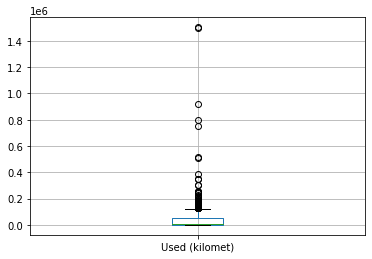

In [398]:
data.boxplot(column="Used (kilomet)")

Price

Text(0, 0.5, 'No of passenger')

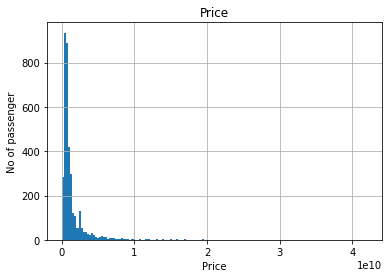

In [399]:
figure=data['Price'].hist(bins=150)
figure.set_title('Price')
figure.set_xlabel('Price')
figure.set_ylabel('No of passenger')

<AxesSubplot:>

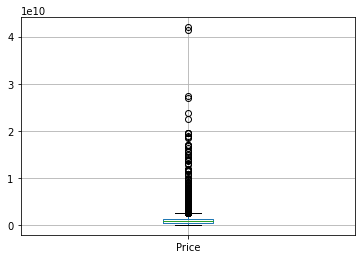

In [400]:
data.boxplot(column="Price")

In [401]:
def outliers(data):
    # Star is skewed to the left
    q3_1 , q1_1 = np.percentile(data['Used (kilomet)'], [75,25])
    IQR_1 = q3_1 - q1_1
    upper_Used = q3_1 + 1.5 * IQR_1
    lower_Used = q1_1 - 1.5 * IQR_1
    data.loc[data['Used (kilomet)'] >= upper_Used, 'Used (kilomet)'] = round(lower_Used)

    # Fork is skewed to the left
    q3_2 , q1_2 = np.percentile(data['Price'], [75,25])
    IQR_2 = q3_2 - q1_2
    upper_Price = q3_2 + 1.5 * IQR_2
    lower_Price = q1_2 - 1.5 * IQR_2
    data.loc[data['Price'] >= upper_Price, 'Price'] = round(lower_Price)
    return data

Text(0, 0.5, 'No of passenger')

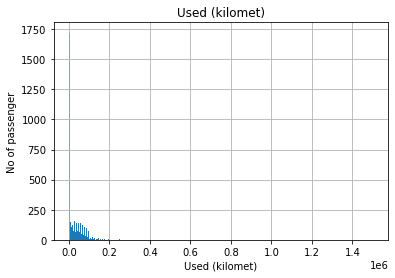

In [402]:
figure=data['Used (kilomet)'].hist(bins=300)
figure.set_title('Used (kilomet)')
figure.set_xlabel('Used (kilomet)')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

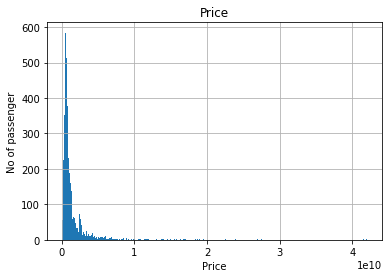

In [403]:
figure=data['Price'].hist(bins=300)
figure.set_title('Price')
figure.set_xlabel('Price')
figure.set_ylabel('No of passenger')

# Feature Transformation

Min-Max Scaling

Min Max Scaling scales the values between 0 to 1: X_scaled = (X - X.min / (X.max - X.min)

In [404]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
final_data=pd.DataFrame(min_max.fit_transform(data),columns=data.columns)
final_data.head()

,Year,New Or Old,Production Origin,Car Gearbox,Used (kilomet),Price,Color_màu cam,Color_màu cát,Color_màu ghi,Color_màu hồng,...,Company_Suzuki,Company_Thaco,Company_Toyota,Company_VinFast,Company_Volkswagen,Company_Volvo,Company_Zotye,Fuel Type_máy xăng,Fuel Type_xe hybrid,Fuel Type_xe điện
0,1.00000,1.0,0.0,1.0,0.000000,0.102464,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.00000,1.0,1.0,1.0,0.000000,0.055692,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.00000,1.0,1.0,1.0,0.000000,0.055692,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.90625,0.0,0.0,1.0,0.006656,0.071958,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.00000,1.0,0.0,1.0,0.000000,0.014907,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Ma trận tương quan

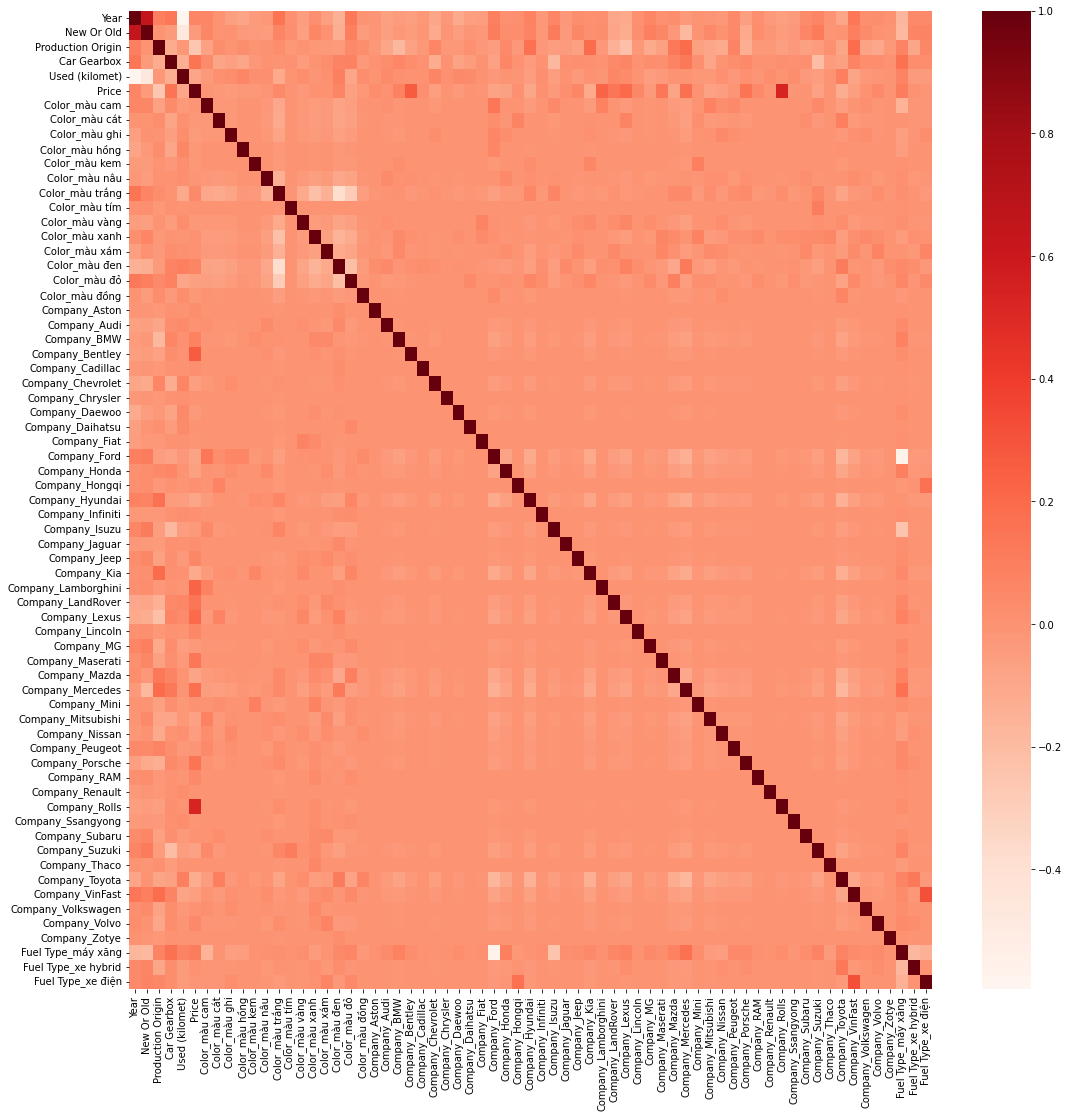

In [405]:
plt.figure(figsize=(18,18))
sns.heatmap(final_data.corr(),annot=False,cmap=plt.cm.Reds)
plt.show()

# Final Features Selection

In [406]:
final_data.columns

Index(['Year', 'New Or Old', 'Production Origin', 'Car Gearbox',
       'Used (kilomet)', 'Price', 'Color_màu cam', 'Color_màu cát',
       'Color_màu ghi', 'Color_màu hồng', 'Color_màu kem', 'Color_màu nâu',
       'Color_màu trắng', 'Color_màu tím', 'Color_màu vàng', 'Color_màu xanh',
       'Color_màu xám', 'Color_màu đen', 'Color_màu đỏ', 'Color_màu đồng',
       'Company_Aston', 'Company_Audi', 'Company_BMW', 'Company_Bentley',
       'Company_Cadillac', 'Company_Chevrolet', 'Company_Chrysler',
       'Company_Daewoo', 'Company_Daihatsu', 'Company_Fiat', 'Company_Ford',
       'Company_Honda', 'Company_Hongqi', 'Company_Hyundai',
       'Company_Infiniti', 'Company_Isuzu', 'Company_Jaguar', 'Company_Jeep',
       'Company_Kia', 'Company_Lamborghini', 'Company_LandRover',
       'Company_Lexus', 'Company_Lincoln', 'Company_MG', 'Company_Maserati',
       'Company_Mazda', 'Company_Mercedes', 'Company_Mini',
       'Company_Mitsubishi', 'Company_Nissan', 'Company_Peugeot',
       'Co

In [407]:
X = final_data.loc[:,['Year', 'New Or Old', 'Production Origin', 'Car Gearbox',
       'Used (kilomet)', 'Color_màu cam', 'Color_màu cát',
       'Color_màu ghi', 'Color_màu hồng', 'Color_màu kem', 'Color_màu nâu',
       'Color_màu trắng', 'Color_màu tím', 'Color_màu vàng', 'Color_màu xanh',
       'Color_màu xám', 'Color_màu đen', 'Color_màu đỏ', 'Color_màu đồng',
       'Company_Aston', 'Company_Audi', 'Company_BMW', 'Company_Bentley',
       'Company_Cadillac', 'Company_Chevrolet', 'Company_Chrysler',
       'Company_Daewoo', 'Company_Daihatsu', 'Company_Fiat', 'Company_Ford',
       'Company_Honda', 'Company_Hongqi', 'Company_Hyundai',
       'Company_Infiniti', 'Company_Isuzu', 'Company_Jaguar', 'Company_Jeep',
       'Company_Kia', 'Company_Lamborghini', 'Company_LandRover',
       'Company_Lexus', 'Company_Lincoln', 'Company_MG', 'Company_Maserati',
       'Company_Mazda', 'Company_Mercedes', 'Company_Mini',
       'Company_Mitsubishi', 'Company_Nissan', 'Company_Peugeot',
       'Company_Porsche', 'Company_RAM', 'Company_Renault', 'Company_Rolls',
       'Company_Ssangyong', 'Company_Subaru', 'Company_Suzuki',
       'Company_Thaco', 'Company_Toyota', 'Company_VinFast',
       'Company_Volkswagen', 'Company_Volvo', 'Company_Zotye',
       'Fuel Type_máy xăng', 'Fuel Type_xe hybrid', 'Fuel Type_xe điện']]
X.shape

(3640, 66)

In [408]:
y = final_data.loc[:,['Price']]
y.head()

,Price
0,0.102464
1,0.055692
2,0.055692
3,0.071958
4,0.014907


# Build it (Model)

In [409]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 25)

Linear Regression

In [410]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred1= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.65904026415604
Accuracy on Testing set:  0.7080980881758261


Random Forest Regressor

In [411]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred2= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

C:\Users\dongu\AppData\Local\Temp\ipykernel_364\3914061150.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Accuracy on Traing set:  0.9090933226285877
Accuracy on Testing set:  0.7637465862692677


# Đánh giá mô hình
MAE,MSE

Linear Regression

In [412]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred1))

		Error Table
Mean Absolute Error      :  0.017121724990811892
Mean Squared  Error      :  0.0008567843225076812


Random Forest Regressor

In [413]:
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred2))

		Error Table
Mean Absolute Error      :  0.01123236510338611
Mean Squared  Error      :  0.0006934460269836746
